#XOR Problem

##Imports

In [9]:
import torch
import torch.nn.functional as F
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

randomSeed = 123
DEVICE = ('cuda:0' if torch.cuda.is_available() else "cpu")


In [10]:
df = pd.read_csv("xor.csv")
X = df[['x1','x2']].values
y = df['class label'].values


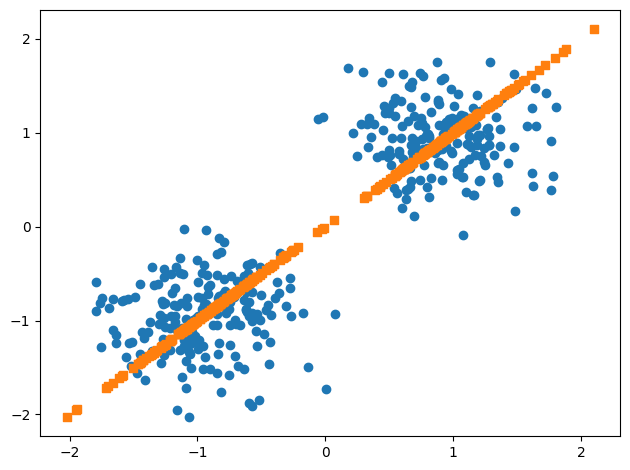

In [11]:
plt.scatter(X[y==0 , 0], X[y==0,1], marker='o')
plt.scatter(X[y==1 , 0], X[y==1,0], marker='s')
plt.tight_layout()
plt.show()

##MLP with Linear Activations

In [12]:
class MLPLinear(torch.nn.Module):
  def __init__(self,numFeatures,numHidden1,numClasses):
    super(MLPLinear,self).__init__()
    self.classes = numClasses
    self.linear1 = torch.nn.Linear(numFeatures,numHidden1)
    self.linearOut = torch.nn.Linear(numHidden1,numClasses)

  def forward(self,x):
    out = self.linear1(x)
    logits = self.linearOut(out)
    probas = F.softmax(logits,dim=1)
    return logits,probas



In [13]:
torch.manual_seed(randomSeed)
model1 = MLPLinear(2,50,2)
model1 = model1.to(DEVICE)
optimizer = torch.optim.SGD(model1.parameters(),lr=0.1)

In [14]:
startTime = time.time()
miniBatchCost = []
numEpochs = 25

features = torch.tensor(X,dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)


In [15]:
for i in range(numEpochs):
  #logits and probabilities
  logits,probas = model1(features)
  cost = F.cross_entropy(logits,targets)
  optimizer.zero_grad()
  cost.backward()
  miniBatchCost.append(cost)
  optimizer.step()

  ##Logging
  print(f'Epoch: {i+1:03d}/{numEpochs:03d} | Cost: {cost:.4f}')
print('Total Training Time: %.2f min' %((time.time()-startTime)/60))


Epoch: 001/025 | Cost: 0.7075
Epoch: 002/025 | Cost: 0.6980
Epoch: 003/025 | Cost: 0.6946
Epoch: 004/025 | Cost: 0.6933
Epoch: 005/025 | Cost: 0.6929
Epoch: 006/025 | Cost: 0.6928
Epoch: 007/025 | Cost: 0.6927
Epoch: 008/025 | Cost: 0.6927
Epoch: 009/025 | Cost: 0.6927
Epoch: 010/025 | Cost: 0.6927
Epoch: 011/025 | Cost: 0.6927
Epoch: 012/025 | Cost: 0.6927
Epoch: 013/025 | Cost: 0.6927
Epoch: 014/025 | Cost: 0.6927
Epoch: 015/025 | Cost: 0.6927
Epoch: 016/025 | Cost: 0.6927
Epoch: 017/025 | Cost: 0.6927
Epoch: 018/025 | Cost: 0.6927
Epoch: 019/025 | Cost: 0.6927
Epoch: 020/025 | Cost: 0.6927
Epoch: 021/025 | Cost: 0.6927
Epoch: 022/025 | Cost: 0.6927
Epoch: 023/025 | Cost: 0.6927
Epoch: 024/025 | Cost: 0.6927
Epoch: 025/025 | Cost: 0.6927
Total Training Time: 0.00 min


In [16]:
from matplotlib.colors import ListedColormap
import numpy as np

def plotDecisionRegions(X,y,classifier, resolution=0.02):

  markers = ['s','x','o','^','v']
  colors  = ['red','blue','lightgreen','gray','cyan']
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1min , x1max = X[: ,0].min() -1, X[:,0].max()+1
  x2min , x2max = X[: ,1].min() -1, X[:,1].max()+1
  xx1, xx2 = np.meshgrid(np.arange(x1min,x1max,resolution),
                         np.arange(x2min,x2max,resolution))
  tensor = torch.tensor(np.array([xx1.ravel(),xx2.ravel()]).T).float()
  logits, probas = classifier.forward(tensor)
  z = np.argmax(probas.detach().numpy(),axis=1)
  z = z.reshape(xx1.shape)

  plt.contourf(xx1,xx2,z, alpha=0.4,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())

  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0], y=X[y == cl,1],
                alpha=0.8,color=cmap(idx),
                edgecolor = 'black',
                marker = markers[idx],
                label = cl)

<ipython-input-16-252ace65f377>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y == cl,1],


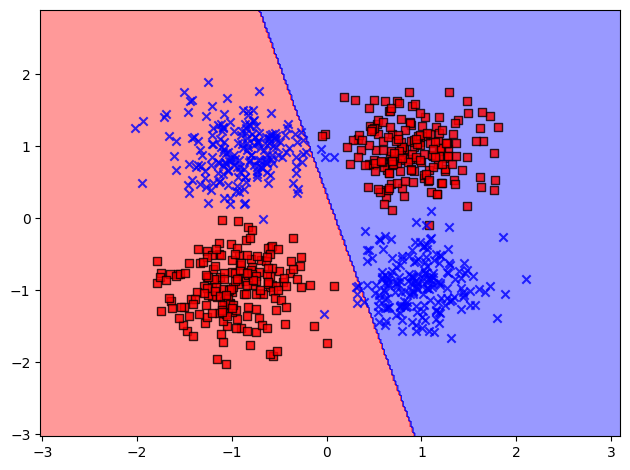

In [17]:
plotDecisionRegions(features,targets,model1)
plt.tight_layout()
plt.show()

##MLP with Non-Linear Activations

In [20]:
class MLPReLU(torch.nn.Module):
  def __init__(self,numFeatures,numHidden, numClasses):
    super(MLPReLU,self).__init__()
    self.numClasses = numClasses
    self.linear1 = torch.nn.Linear(numFeatures,numHidden)
    self.linearOut = torch.nn.Linear(numHidden,numClasses)

  def forward(self,x):
    out = self.linear1(x)
    out = F.relu(out)

    logits = self.linearOut(out)
    probas = F.softmax(logits)
    return logits,probas


In [21]:
torch.manual_seed(randomSeed)
model2 = MLPReLU(2,50,2)
model2 = model2.to(DEVICE)

optimizer = torch.optim.SGD(model2.parameters(),lr=0.1)


In [22]:
startTime = time.time()
miniBatchCost = []
numEpochs = 25

features = torch.tensor(X,dtype=torch.float).to(DEVICE)
targets = torch.tensor(y, dtype=torch.long).to(DEVICE)


In [23]:
for i in range(numEpochs):
  #logits and probabilities
  logits,probas = model2(features)
  cost = F.cross_entropy(logits,targets)
  optimizer.zero_grad()
  cost.backward()
  miniBatchCost.append(cost)
  optimizer.step()

  ##Logging
  print(f'Epoch: {i+1:03d}/{numEpochs:03d} | Cost: {cost:.4f}')
print('Total Training Time: %.2f min' %((time.time()-startTime)/60))


Epoch: 001/025 | Cost: 0.7163
Epoch: 002/025 | Cost: 0.6874
Epoch: 003/025 | Cost: 0.6631
Epoch: 004/025 | Cost: 0.6412
Epoch: 005/025 | Cost: 0.6210
Epoch: 006/025 | Cost: 0.6019
Epoch: 007/025 | Cost: 0.5838
Epoch: 008/025 | Cost: 0.5665
Epoch: 009/025 | Cost: 0.5501
Epoch: 010/025 | Cost: 0.5344
Epoch: 011/025 | Cost: 0.5193
Epoch: 012/025 | Cost: 0.5049
Epoch: 013/025 | Cost: 0.4910
Epoch: 014/025 | Cost: 0.4777
Epoch: 015/025 | Cost: 0.4649
Epoch: 016/025 | Cost: 0.4525
Epoch: 017/025 | Cost: 0.4406
Epoch: 018/025 | Cost: 0.4291
Epoch: 019/025 | Cost: 0.4181
Epoch: 020/025 | Cost: 0.4074
Epoch: 021/025 | Cost: 0.3971
Epoch: 022/025 | Cost: 0.3872
Epoch: 023/025 | Cost: 0.3776
Epoch: 024/025 | Cost: 0.3684
Epoch: 025/025 | Cost: 0.3594
Total Training Time: 0.04 min


<ipython-input-20-61a91e77c471>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probas = F.softmax(logits)


<ipython-input-20-61a91e77c471>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probas = F.softmax(logits)
<ipython-input-16-252ace65f377>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y=X[y == cl,1],


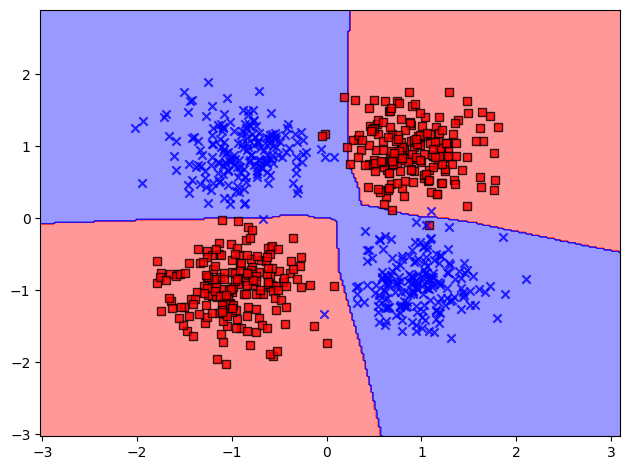

In [24]:
plotDecisionRegions(features,targets,model2)
plt.tight_layout()
plt.show()